# Satisfied = 1. # Unsatisfied = 0
Max Sat Time = 10 μs. Max Unsat Time = 0 μs
Ave Sat Time = 1.0 μs. Ave UnSat Time = 0.0 μs
# Satisfied = 1. # Unsatisfied = 0
Max Sat Time = 325 μs. Max Unsat Time = 0 μs
Ave Sat Time = 32.5 μs. Ave UnSat Time = 0.0 μs
# Satisfied = 1. # Unsatisfied = 0
Max Sat Time = 1451 μs. Max Unsat Time = 0 μs
Ave Sat Time = 145.1 μs. Ave UnSat Time = 0.0 μs
# Satisfied = 0. # Unsatisfied = 1
Max Sat Time = 0 μs. Max Unsat Time = 520538 μs
Ave Sat Time = 0.0 μs. Ave UnSat Time = 52053.8 μs
# Satisfied = 0. # Unsatisfied = 1
Max Sat Time = 0 μs. Max Unsat Time = 1556839 μs
Ave Sat Time = 0.0 μs. Ave UnSat Time = 155683.9 μs


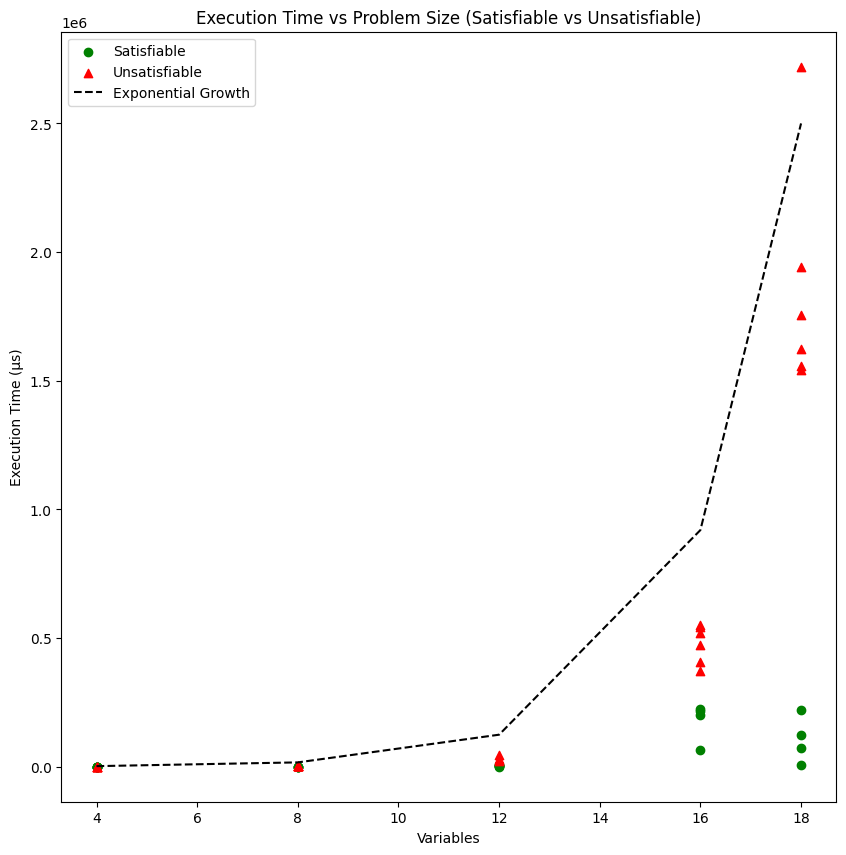

In [2]:
import time
import random
import csv
import matplotlib.pyplot as plt
import numpy as np

# read wff from file
def parse_file(file_name):
  test_cases = []
  # open file for reading
  with open(file_path, 'r') as file:
    # parse through each line of file
    for line in file:
      # convert each line to list of integers
      numbers = list(map(int, line.strip().split()))
      # add numbers to test_cases
      test_cases.append(numbers)
  return test_cases

# increment binary assignment array
def increment(Assignment):
  # increment through Assigment list
  for i in range(0,len(Assignment)):
    # flip first 0 to 1 and stop
    if Assignment[i] == 0:
      Assignment[i] = 1
      return True
    # if current value is 1 set it to 0
    Assignment[i] = 0
  return False

# check if current assignment satisfies wff
def check(wff,Nvars,Nclauses,Assignment):
  # iterate over all possible assignments
  while True:
    Satisfiable = True
    # check each clause within wff
    for clause in wff:
      clause_satisfied = False
      # check each literal in clause
      for literal in clause:
        var = abs(literal) # get variable index
        # evaluate clause with the current assignment
        if (literal > 0 and Assignment[var] == True) or (literal < 0 and Assignment[var] == False):
          clause_satisfied = True
          break
      # if clause not satisfied, mark wff as unsatisfiable
      if not clause_satisfied:
        Satisfiable = False
        break

    # if all clauses satisfied, wff is satisfiable
    if Satisfiable:
      return True

    # if no more assignments to check, return false
    if not increment(Assignment):
      return False

# test single wff and return execution time
def test_wff(wff, Nvars, Nclauses):
    # intialize all variable assignments to 0
    Assignment=list((0 for x in range(Nvars+2)))
    start = time.time() # Start timer
    # check if current wff is satisfiable with assignment
    SatFlag=check(wff,Nvars,Nclauses,Assignment)
    end = time.time() # End timer
    exec_time=int((end-start)*1e6) # calculate execution time
    return [wff,Assignment,SatFlag,exec_time]

# build random wff in cnf format with specified number of vars, clauses, and lits per clause
def build_wff(Nvars,Nclauses,LitsPerClause):
    wff = []
    for i in range(1,Nclauses+1):
        clause = []
        for j in range(1,LitsPerClause+1):
            var = random.randint(1,Nvars) # randomly select a variable
            if random.randint(0,1) == 0:
              var = -var # randomly negate the variable
            clause.append(var)
        wff.append(clause) # add clause to wff
    return wff

# run multiple test cases
def run_cases(TestCases, ProbNum, resultsfile, tracefile, cnffile):
    # create empty arrays used later for plotting
    sizes = [] # number of variables
    times = [] # execution time
    satisfiable_vars = [] # satisfiable cases
    unsatisfiable_vars = [] # unsatisfiable cases

    # open each file to write to
    f1=open(resultsfile+".csv",'w')
    f2=open(tracefile+".csv",'w')
    f3=open(cnffile+".cnf","w")

    # initialize counters
    Nwffs = Nsat = Nunsat = 0

    f1.write('ProbNum,Nvars,NClauses,LitsPerClause,Result,ExecTime(us)\n')

    # iterate over each test case
    for i, TestCase in enumerate(TestCases):
        Nvars, NClauses, LitsPerClause, Ntrials = TestCase

        for j in range(Ntrials):
            # increment wff counter
            Nwffs += 1
            # set random seed for reproducibility
            random.seed(ProbNum)
            # build wff
            wff = build_wff(Nvars,NClauses,LitsPerClause)
            # test wff
            results=test_wff(wff,Nvars,NClauses)
            wff=results[0]
            Assignment=results[1]
            Exec_Time=results[3]
            Scount = Ucount = AveStime = AveUtime = MaxStime = MaxUtime = 0

            sizes.append(Nvars)
            times.append(Exec_Time)

            # check if wff is satisfiable or unsatisfiable
            if results[2]:
                y='Satisfiable'
                # add to amount of satisfiables
                Scount=Scount+1
                AveStime=AveStime+Exec_Time
                MaxStime=max(MaxStime,Exec_Time)
                Nsat=Nsat+1
                # add satisfiable variables to list
                satisfiable_vars.append((Nvars,Exec_Time))
            else:
                y='Unsatisfiable'
                Ucount=Ucount+1
                AveUtime=AveUtime+Exec_Time
                MaxUtime=max(MaxUtime,Exec_Time)
                Nunsat=Nunsat+1
                # add unsatisfiable variables to list
                unsatisfiable_vars.append((Nvars,Exec_Time))

            # write results to files
            x = str(ProbNum) + ',' + str(Nvars) + ',' + str(NClauses) + ',' + str(LitsPerClause)
            x = x + str(NClauses*LitsPerClause) + ',' + y + ',1,' + str(Exec_Time)

            if results[2]:
                for k in range(1, Nvars +1 ):
                    x = x + ',' + str(Assignment[k])

            print(x)
            # write to csv files
            f1.write(x + '\n')
            f2.write(x + '\n')

            # write wff to cnf file
            if not(ShowAnswer):
                y = '?'
            x = "c " + str(ProbNum) + " " + str(LitsPerClause) + " " + y + "\n"
            f3.write(x)
            x = "p cnf " + str(Nvars) + " " + str(NClauses) + "\n"
            f3.write(x)
            for i in range(0, len(wff)):
                clause = wff[i]
                x = ""
                for j in range(0, len(clause)):
                    x = x + str(clause[j]) + ","
                x = x + "0\n"
                f3.write(x)
            #Increment problem number for next iteration
            ProbNum += 1

        # print results
        counts='# Satisfied = '+str(Scount)+'. # Unsatisfied = '+str(Ucount)
        maxes='Max Sat Time = '+str(MaxStime) +' μs'+'. Max Unsat Time = '+str(MaxUtime) + ' μs'
        averages='Ave Sat Time = '+str(AveStime/Ntrials)+ ' μs' +'. Ave UnSat Time = '+str(AveUtime/Ntrials) + ' μs'
        print(counts)
        print(maxes)
        print(averages)
        f2.write(counts+'\n')
        f2.write(maxes+'\n')
        f2.write(averages+'\n')

    x=cnffile+",TheBoss,"+str(Nwffs)+","+str(Nsat)+","+str(Nunsat)+","+str(Nwffs)+","+str(Nwffs)+"\n"

    # plot satisfiable as green and unsatisfiable as red
    satisfiable_x = [var[0] for var in satisfiable_vars]
    satisfiable_y = [var[1] for var in satisfiable_vars]
    unsatisfiable_x = [var[0] for var in unsatisfiable_vars]
    unsatisfiable_y = [var[1] for var in unsatisfiable_vars]

    plt.figure(figsize=(10, 10))

    # Plot satisfiable as green circles
    plt.scatter(satisfiable_x, satisfiable_y, color='green', marker='o', label='Satisfiable')

    # Plot unsatisfiable as red triangles
    plt.scatter(unsatisfiable_x, unsatisfiable_y, color='red', marker='^', label='Unsatisfiable')

    # plot exponential line to highlight exponential growth of time need to solve these wffs
    exp_line = np.exp(np.array(sizes) * 0.5)
    exp_line = exp_line / np.max(exp_line) * 2500000
    plt.plot(sizes, exp_line, 'k--', label="Exponential Growth")

    # details for plot
    plt.xlabel("Variables")
    plt.ylabel("Execution Time (μs)")
    plt.title("Execution Time vs Problem Size (Satisfiable vs Unsatisfiable)")
    plt.legend()
    plt.show()

    # close all files
    f1.close()
    f2.close()
    f3.close()

# global flags
trace = True
ShowAnswer = True

# test file created by me
file_path = 'data_alliegator.txt'
test_cases = parse_file(file_path)

# run test case through code
run_cases(test_cases, ProbNum=3, resultsfile="resultsfile", tracefile="tracefile", cnffile="cnffile")
